In [33]:
import pandas as pd

In [34]:
# Data Ingestion
df = pd.read_csv('data/Diamond Price Prediction.csv')
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [37]:
df.duplicated().sum()

146

In [38]:
df = df.drop_duplicates()

In [39]:
df.duplicated().sum()

0

In [40]:
# Segregate Numerical and categorical features
num_feat = df.columns[df.dtypes!=object]
cat_feat = df.columns[df.dtypes==object]

print(num_feat)
print(cat_feat)

Index(['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)',
       'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')
Index(['Cut(Quality)', 'Color', 'Clarity'], dtype='object')


In [41]:
df['Cut(Quality)'].value_counts()

Cut(Quality)
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [42]:
df['Color'].value_counts()

Color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [43]:
df['Clarity'].value_counts()

Clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

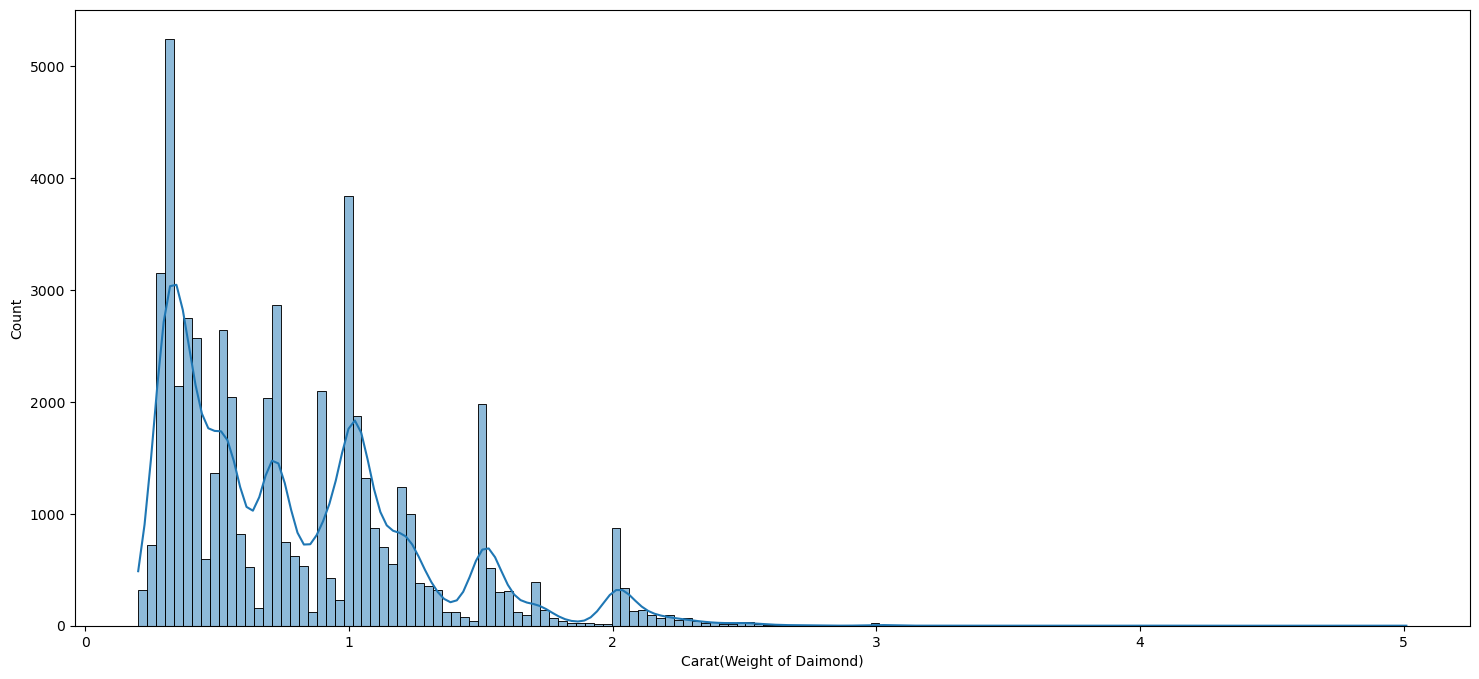

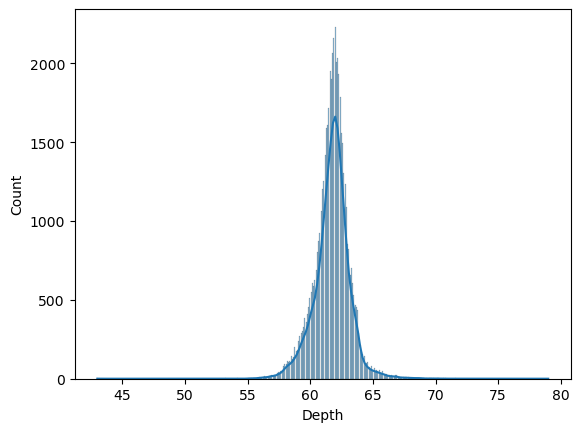

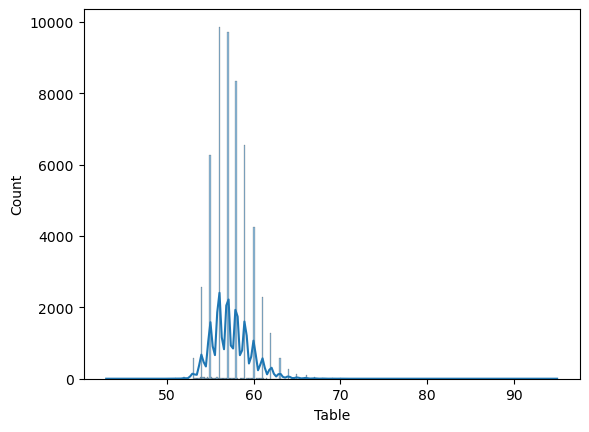

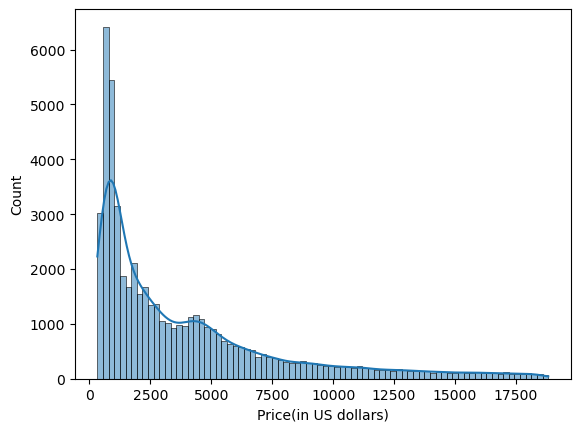

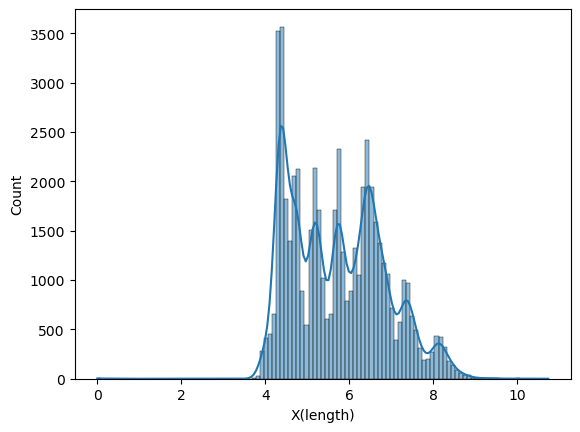

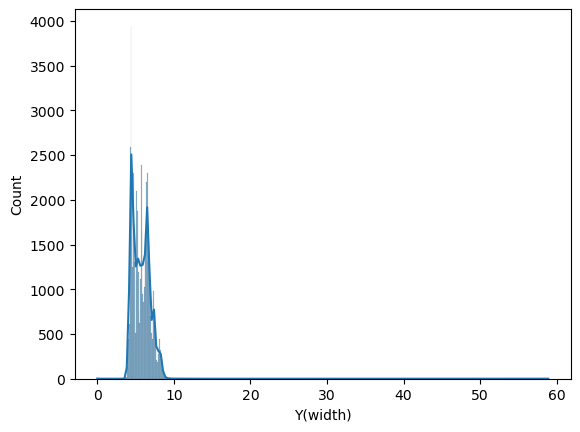

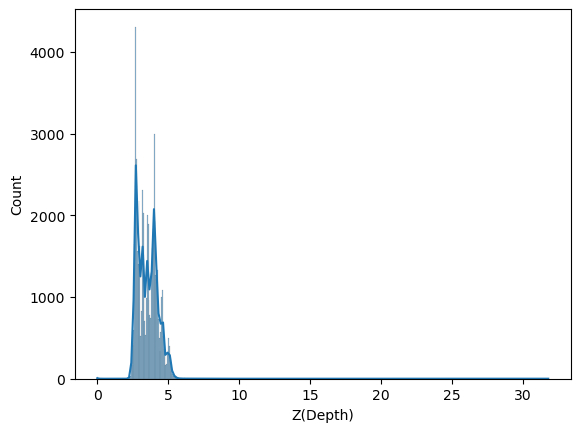

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
x = 0
for i in num_feat:
    sns.histplot(data = df,x = i, kde = True)
    print('\n')
    plt.show()

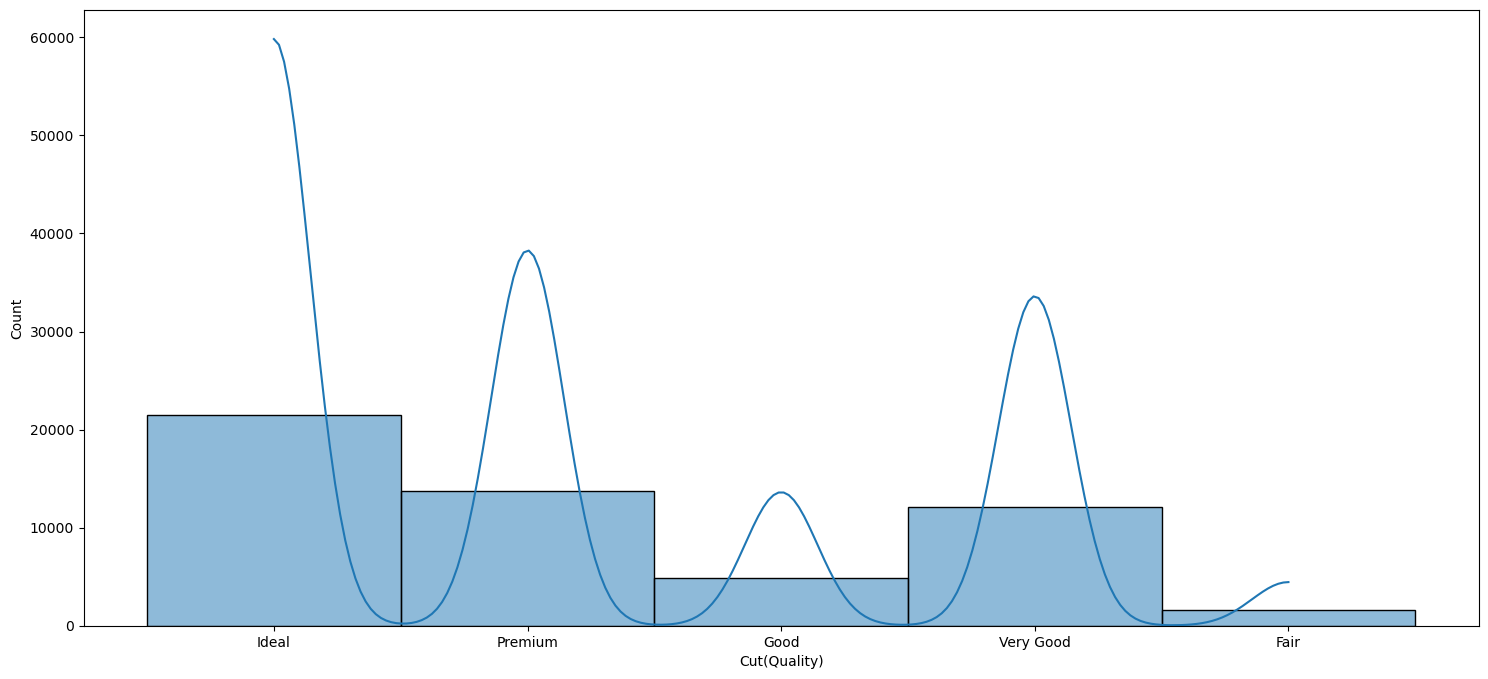

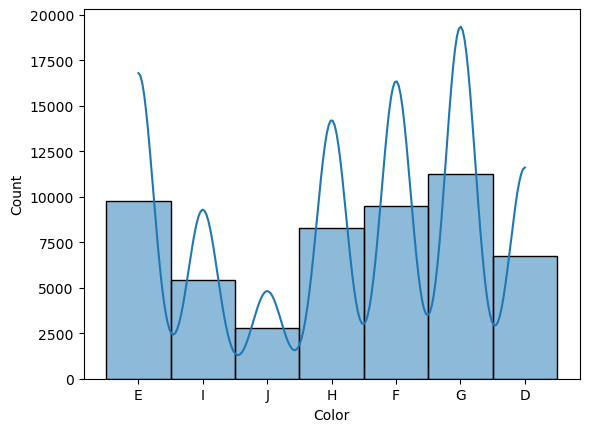

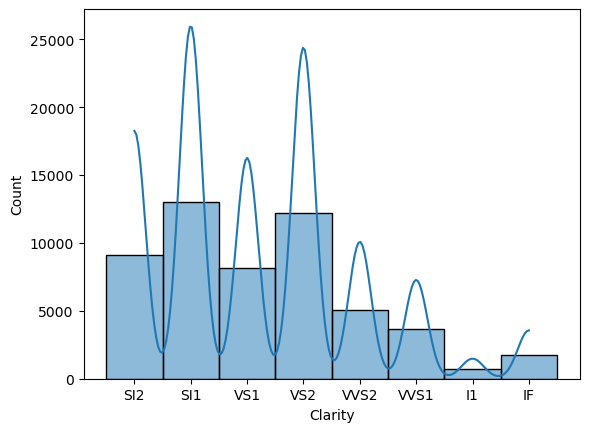

In [45]:
plt.figure(figsize=(18,8))
x = 0
for i in cat_feat:
    sns.histplot(data = df,x = i, kde = True)
    print('\n')
    plt.show()

<Axes: >

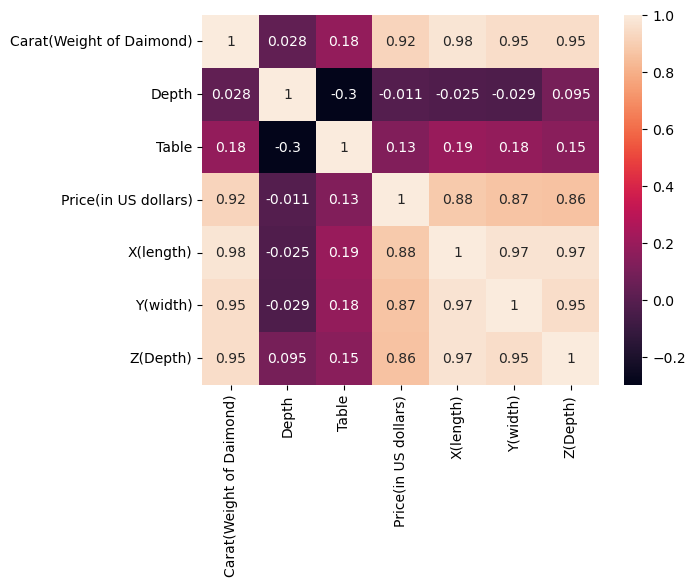

In [46]:
# Correlation
sns.heatmap(df[num_feat].corr(),annot = True)

we observe that x,y,z are highly correlated to carat and also they are correlated with each other so we can drop them


In [47]:
# df.drop(labels=['X(length)','Y(width)','Z(Depth)'],axis=1)

In [48]:
df['Cut(Quality)'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [49]:
cut_map = {"Ideal": 5,"Premium": 4,"Good": 2,"Very Good": 3,"Fair": 1}

In [50]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [51]:
clarity_map = {"I1": 1,"SI2": 2,"SI1": 3,"VS2": 4,"VS1": 5,"VVS2": 6,"VVS1": 7,"IF": 8}

In [52]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [53]:
color_map = {"D": 1,"E": 2,"F": 3,"G": 4,"H": 5,"I": 6,"J": 7}

In [54]:
df['Cut(Quality)'] = df['Cut(Quality)'].map(cut_map)
df['Clarity'] = df['Clarity'].map(clarity_map)
df['Color'] = df['Color'].map(color_map)

In [55]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
